In [17]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D,Flatten,Dense
# , InputLayer
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential ,  Model
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from keras.losses import categorical_crossentropy
# from keras.callbacks import ModelCheckpoint
# from keras.optimizers import Adam

In [3]:
nc = 10 # Number of classes

#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, 
#along with a test set of 10,000 images. This dataset can be used as a drop-in 
#replacement for MNIST.
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()



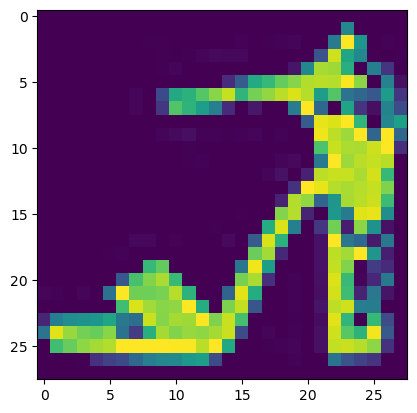

In [4]:
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

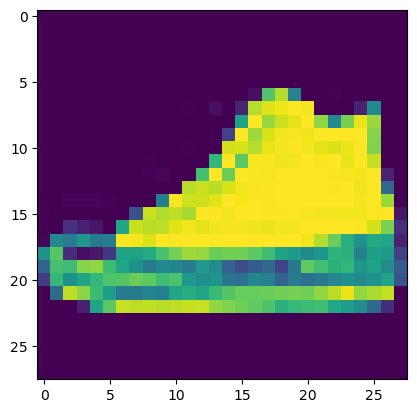

In [5]:
plt.figure(2)
imgplot2 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

In [6]:
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)


In [7]:
model= Sequential()
#FIRST LAYER===>>> 28x28x1 * 3x3 =  26x26x64 is output layer size pf first layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
#SECONS LAYER===>>> 3x3x64 * 3x3
model.add(Conv2D(32,kernel_size=3,activation='relu'))
#26x26x64(output of 1st layer) * 3x3x64 = 24x24x32 is the output size
model.add(Flatten())

model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#BATCH SIZE IS 60000/1875 = 33 is the default batch_size here
model.fit(Xtrain,ytrainEnc,validation_data=(Xtest,ytestEnc),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.5627 - accuracy: 0.8394 - val_loss: 0.3842 - val_accuracy: 0.8624
Epoch 2/3
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3152 - accuracy: 0.8855 - val_loss: 0.3409 - val_accuracy: 0.8766
Epoch 3/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2613 - accuracy: 0.9044 - val_loss: 0.3543 - val_accuracy: 0.8808


In [8]:
ypred = model.predict(Xtest)
#MAX POOLING===>>>where prob is max in the matrix LEC12
ypred = np.argmax(ypred,axis=1) 
score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


313/313 [==============================] - 2s 6ms/step
Accuracy score is 88.08 %


ADDING A FUNCTION TO DISPLAY PREDICTED IN IMAGES FORMAT


THIS WILL DISPLAY THE PREDICTION IN IMAGES HERE WE CAN SEE WHAT THE MODEL REALLY DOES


In [9]:
# Define the class labels
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [10]:
# Function to display predictions of the model
def display_predictions(images, true_labels, predictions, class_labels, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()
    for img, ax, true_label, pred_label in zip(images, axes, true_labels, predictions):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
# Randomly select images to display predictions
num_images_to_display = 25
random_indices = np.random.choice(len(Xtest), num_images_to_display, replace=False)
selected_test_images = Xtest[random_indices]
selected_test_labels = ytest[random_indices]
selected_predictions = ypred[random_indices]

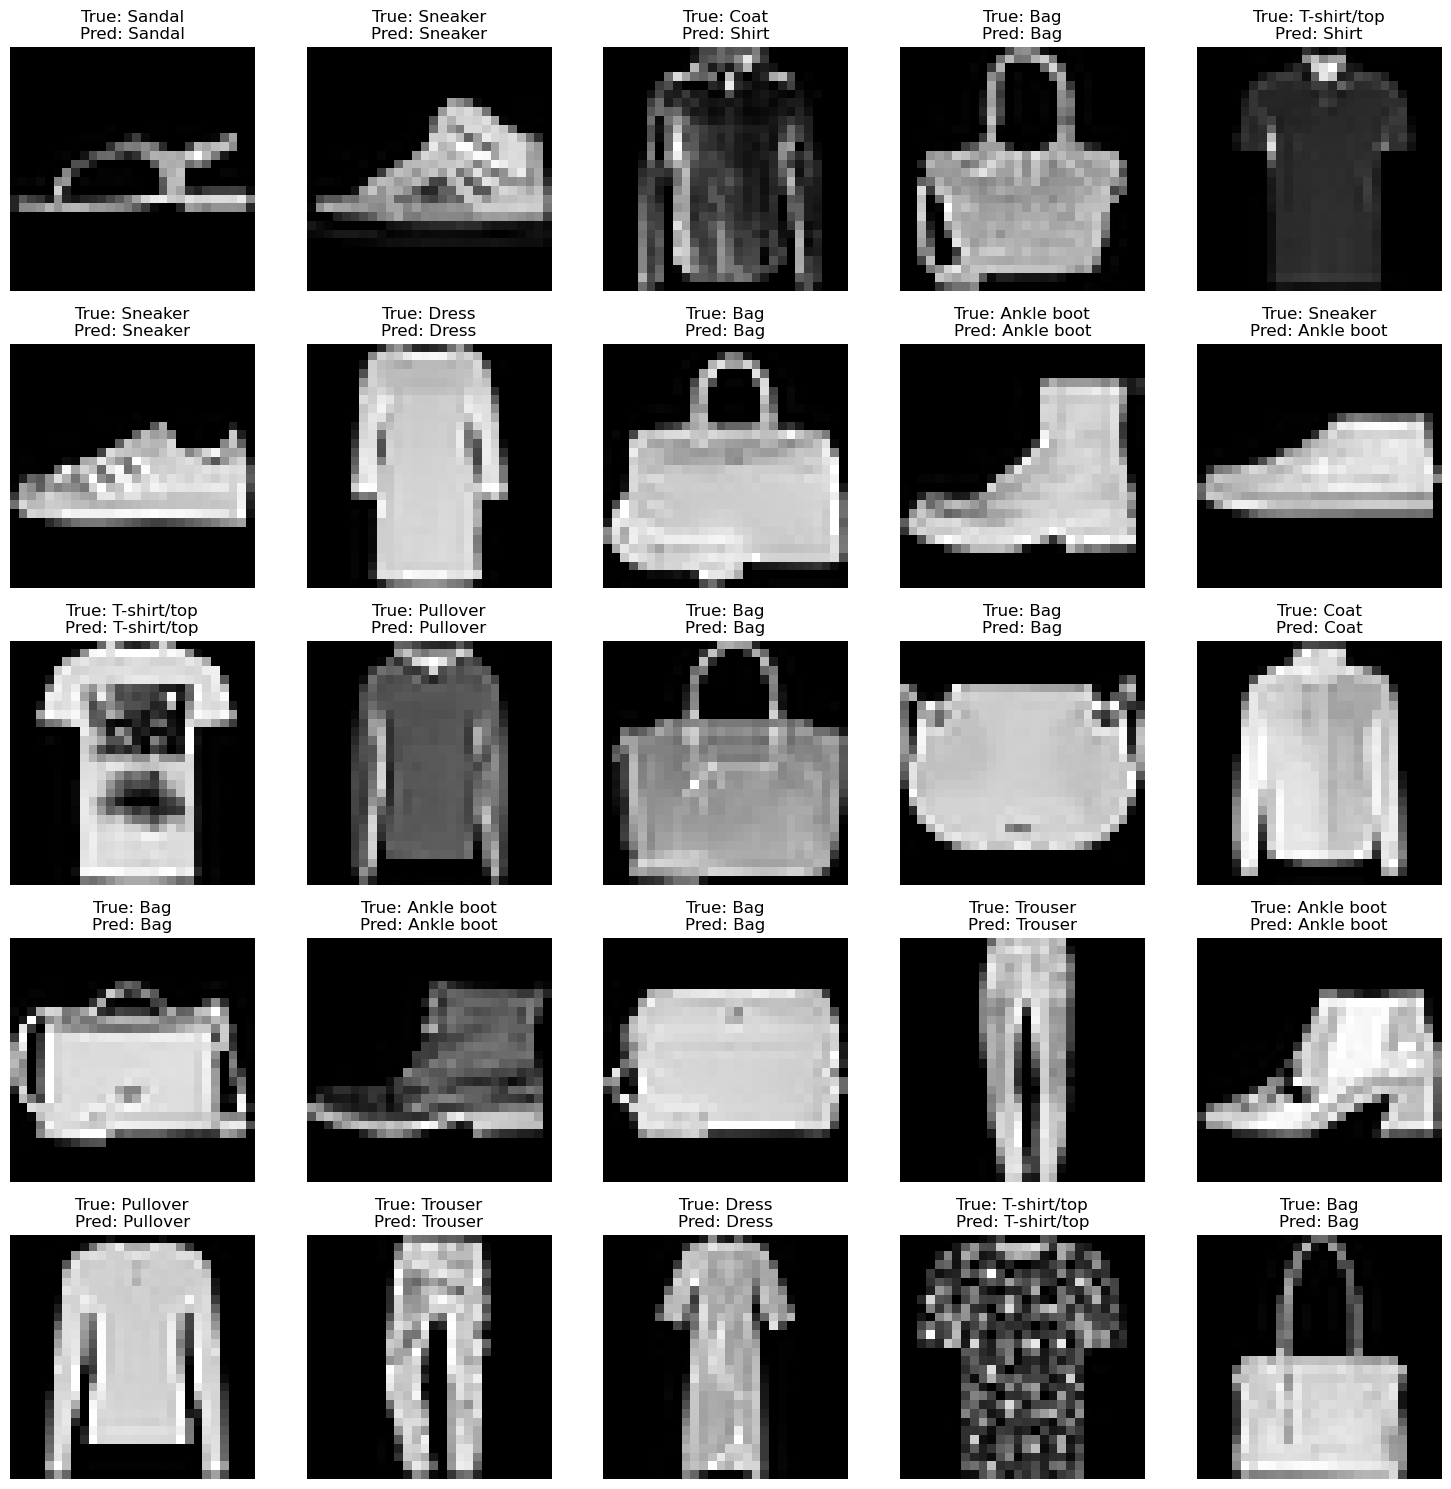

In [12]:
# Display the predictions
display_predictions(selected_test_images, selected_test_labels, selected_predictions, class_labels)

THIS IS NOW BREFORE THE PREDICTION:


THE TRUE VALUES WITHOUT PREDICTION

In [13]:
# Function to display a grid of images with labels
def display_images_with_labels(images, labels, class_labels, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img, cmap='gray')
        ax.set_title(class_labels[label])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [14]:
# Randomly select images to display
num_images_to_display = 9
random_indices = np.random.choice(len(Xtrain), num_images_to_display, replace=False)
selected_images = Xtrain[random_indices]
selected_labels = ytrain[random_indices]

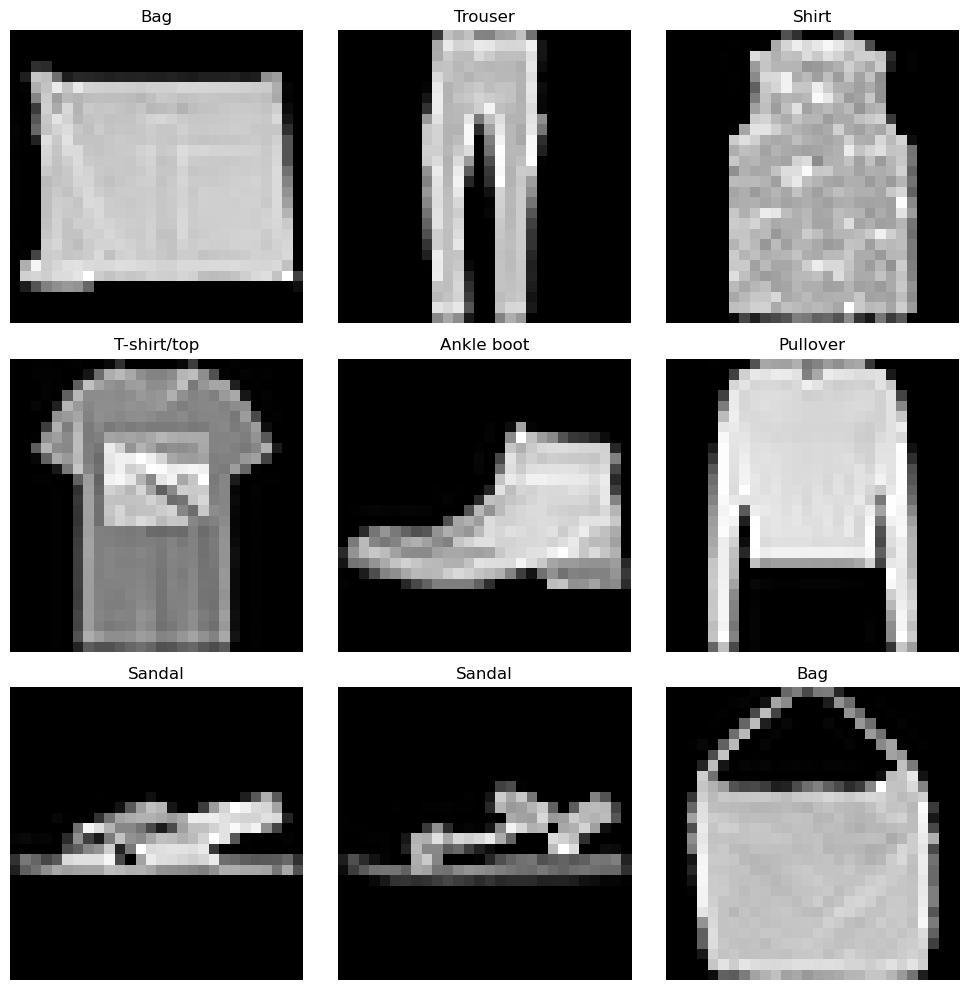

In [15]:
# Display the images with their corresponding labels
display_images_with_labels(selected_images, selected_labels, class_labels)

In [18]:
# K MEANS USUALLY DONE BEFORE TO MAKE THE MODEL MORE ACCURATE AND GET A BETTER 
# VISUALIZATION OF THE DATA BUT HERE IT IS BEING USED TO SHOW CLASSIFICATION IN
# GRAPH FORM FOR A MODEL WHICH IS ALREADY CLASSIFIED

# Extract features from the flattened layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_extractor.predict(Xtest)

# Use t-SNE to reduce dimensionality of the features
tsne = TSNE(n_components=2, random_state=42)
features_reduced = tsne.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=nc, random_state=42)
clusters = kmeans.fit_predict(features_reduced)

313/313 [==============================] - 2s 6ms/step


c:\Users\HP\anaconda32\envs\iit_AIML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


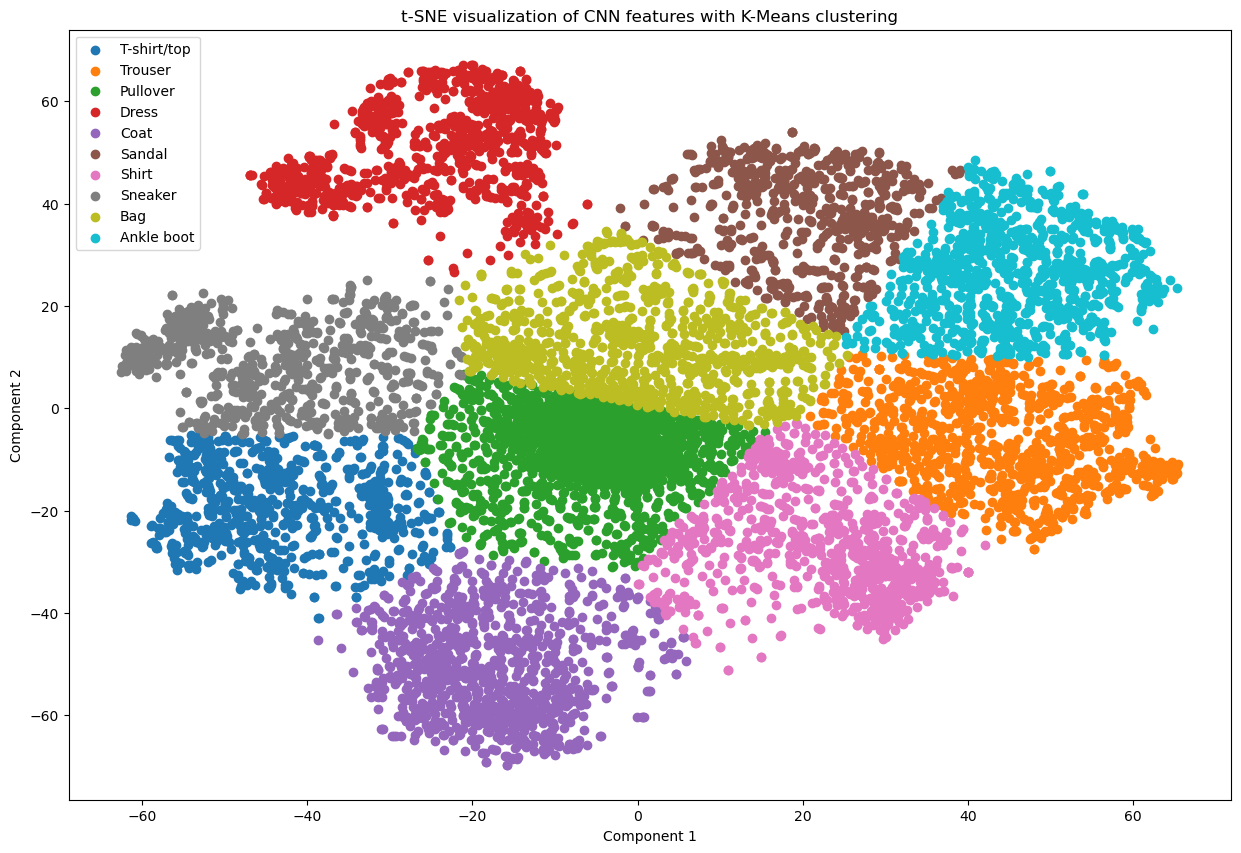

In [19]:
# Visualize the clusters
plt.figure(figsize=(15, 10))
for i in range(nc):
    plt.scatter(features_reduced[clusters == i, 0], features_reduced[clusters == i, 1], label=class_labels[i])
plt.legend()
plt.title("t-SNE visualization of CNN features with K-Means clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()